# 🚀 r/WallStreetBets and the GameStop Short Squeeze 🚀

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# drive.mount('/content/drive', force_remount=True)

## Import libraries:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'matplotlib'

## Read CSV files:

In [3]:
gme = pd.read_csv('stockticker_history.csv', parse_dates=['Date'])
comments = pd.read_csv('comment_analysis.csv', parse_dates=['PostedYYYY-MM-DD'])

## Change Floats to Ints and make a new column for only the day of the month (instead of the entire date)

In [4]:
comments['NumberOfTickerMentions'] = comments['NumberOfTickerMentions'].apply(np.int64)
gme.reset_index(drop=True)
gme['Date'] = gme['Date'].dt.day
comments.reset_index(drop=True)
comments['PostedYYYY-MM-DD'] = comments['PostedYYYY-MM-DD'].dt.day

## Set x and y values for 2 plots

In [5]:
x1 = gme['Date'].values
y1 = gme['Close'].values
x2 = comments['PostedYYYY-MM-DD'].values
y2 = comments['NumberOfTickerMentions'].values

## GME Closing Price (Bar Graph)

<function matplotlib.pyplot.show>

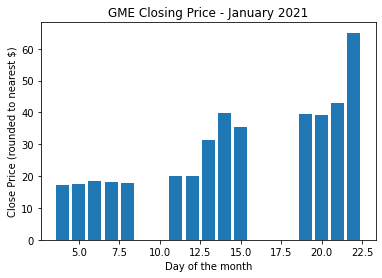

In [6]:
plt.bar(x1, y1)
plt.xlabel('Day of the month')
plt.ylabel('Close Price (rounded to nearest $)')
plt.title('GME Closing Price - January 2021')
plt.show

## Number of GME mentions in WSB (Bar Graph)

<function matplotlib.pyplot.show>

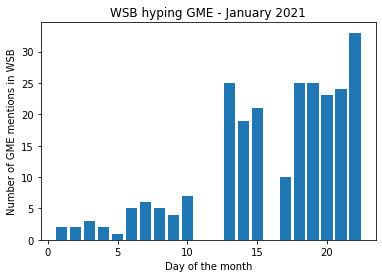

In [7]:
plt.bar(x2, y2)
plt.xlabel('Day of the month')
plt.ylabel('Number of GME mentions in WSB')
plt.title('WSB hyping GME - January 2021')
plt.show

# Conclusion: More mentions == more money activity! 🚀🚀🚀🚀

## Extra fun: Word Cloud of the WSB comments!

In [1]:
# source : https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/
text = comments.Title.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: name 'comments' is not defined